In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem Definition

* Business/Healthcare Objective:
Identify individuals at risk of developing hypertension to enable early intervention.

* Data Science Objective:
Create a binary classification model to predict Has_Hypertension using the given features.

In [3]:
df = pd.read_csv(r"C:\Users\vikra\.cache\kagglehub\datasets\miadul\hypertension-risk-prediction-dataset\versions\1\hypertension_dataset.csv")
df.head(5)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [4]:
# Explore the dataset
df.info()
df.describe(include='all')
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# Check the distribution of the target variable
target_distribution = df['Has_Hypertension'].value_counts(normalize=True)
print("Distribution of target variable (Has_Hypertension):\n", target_distribution)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
Missing values in each column:
 Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History    

In [5]:
df['Medication'] = df['Medication'].fillna('None')

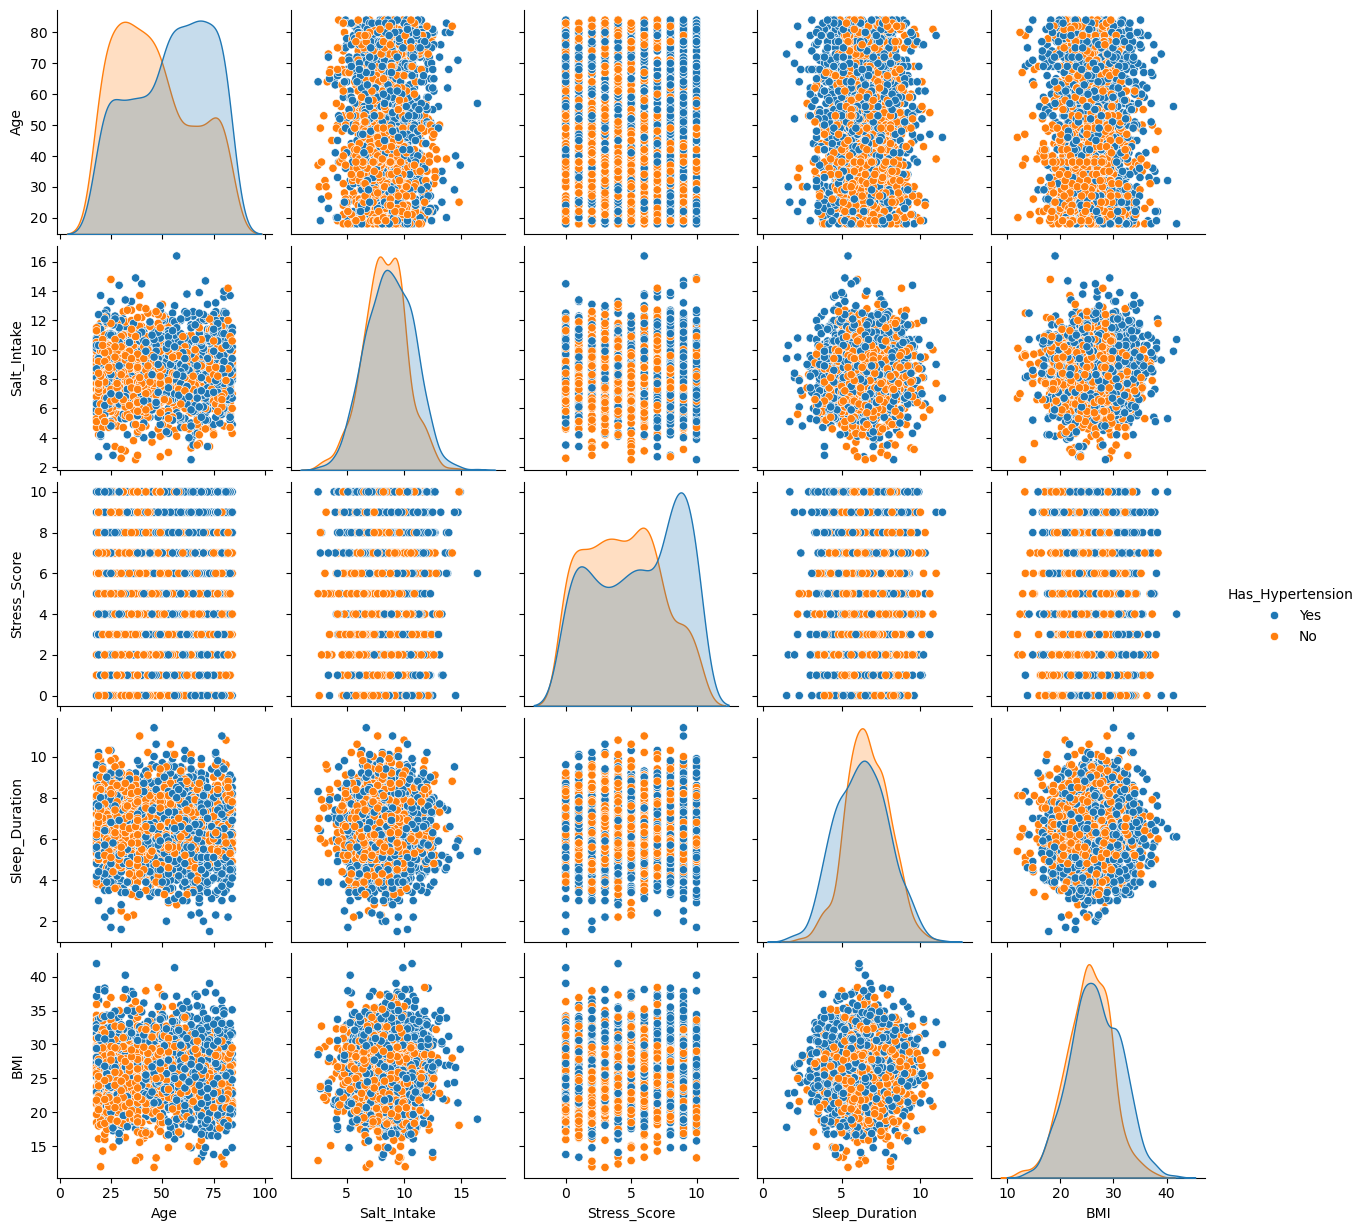

In [6]:
#visual exploration of the dataset
sns.pairplot(df, hue='Has_Hypertension')
plt.show()

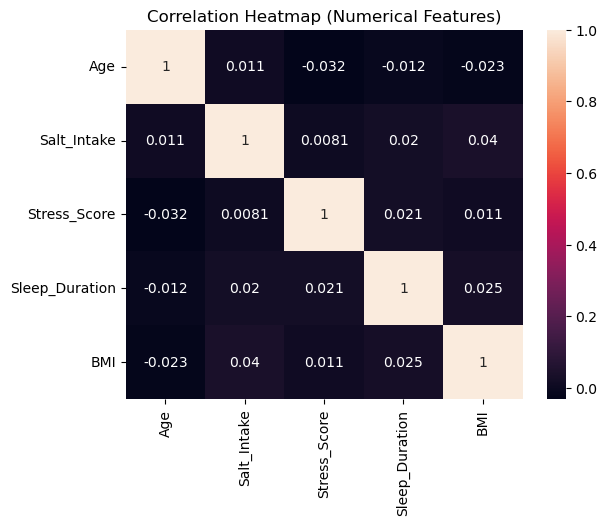

In [7]:
# Correlation Heatmap (Numerical)
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=db, x='Has_Hypertension', y='Age')
plt.title('Age vs Hypertension')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=db, x='Salt_Intake', hue='Has_Hypertension', kde=True)
plt.title('Salt Intake Distribution by Hypertension')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=db, x='Has_Hypertension', y='BMI')
plt.title('BMI vs Hypertension')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=db, x='Has_Hypertension', y='Stress_Score')
plt.title('Stress Score vs Hypertension')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=db, x='Has_Hypertension', y='BP_History')
plt.title('Blood Pressure History vs Hypertension')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=db, x='Smoking_Status', hue='Has_Hypertension')
plt.title('Smoking Status vs Hypertension')
plt.show()


In [8]:

bp_map = {'Normal': 0, 'Prehypertension': 1, 'Hypertension': 2}
exercise_map = {'Low': 0, 'Moderate': 1, 'High': 2}

df['BP_History'] = df['BP_History'].map(bp_map)
df['Exercise_Level'] = df['Exercise_Level'].map(exercise_map)


In [9]:
df = pd.get_dummies(df, columns=['Medication', 'Smoking_Status'])
df = df.drop(['Medication_None', 'Smoking_Status_Non-Smoker'], axis=1)


In [10]:
df['Family_History'] = df['Family_History'].map({'No': 0, 'Yes': 1})
df['Has_Hypertension'] = df['Has_Hypertension'].map({'No': 0, 'Yes': 1})


In [11]:
df.head(15)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Has_Hypertension,Medication_ACE Inhibitor,Medication_Beta Blocker,Medication_Diuretic,Medication_Other,Smoking_Status_Smoker
0,69,8.0,9,0,6.4,25.8,1,0,1,False,False,False,False,False
1,32,11.7,10,0,5.4,23.4,0,0,0,False,False,False,False,False
2,78,9.5,3,0,7.1,18.7,0,1,0,False,False,False,False,False
3,38,10.0,10,2,4.2,22.1,0,0,1,True,False,False,False,False
4,41,9.8,1,1,5.8,16.2,0,1,0,False,False,False,True,False
5,20,10.8,3,2,5.2,21.9,1,2,1,False,True,False,False,False
6,39,8.9,0,0,7.8,27.6,1,2,0,False,True,False,False,False
7,70,5.9,1,2,7.2,25.8,0,1,1,False,False,False,False,False
8,19,9.3,7,0,4.7,36.5,1,0,1,False,True,False,False,True
9,47,7.2,5,0,6.2,24.3,0,2,0,False,False,False,False,False


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Has_Hypertension', axis=1)
y = df['Has_Hypertension']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1588, 13), (397, 13), (1588,), (397,))

In [14]:
X_train.head(15)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Medication_ACE Inhibitor,Medication_Beta Blocker,Medication_Diuretic,Medication_Other,Smoking_Status_Smoker
1168,71,7.3,9,2,7.5,26.7,0,1,True,False,False,False,False
1680,32,8.1,4,1,7.5,29.4,1,0,False,False,False,False,False
115,30,8.1,1,1,7.7,30.0,0,2,False,False,True,False,False
1602,54,6.6,9,0,5.0,20.8,0,1,False,False,True,False,True
1159,63,4.0,7,0,7.4,21.5,1,1,True,False,False,False,True
1712,77,8.3,2,2,5.9,24.2,0,2,False,False,False,False,False
655,25,9.1,3,1,7.9,25.0,0,0,False,False,False,False,True
535,30,2.6,0,1,7.0,29.2,0,2,False,True,False,False,True
70,46,9.9,0,2,6.5,29.9,1,2,False,True,False,False,False
1337,70,5.4,0,1,7.7,29.3,1,2,False,False,True,False,True


In [15]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier




models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier( verbose=0,random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test):.2f}")


LogReg Accuracy: 0.82
RandomForest Accuracy: 0.96
XGBoost Accuracy: 0.97


c:\Users\vikra\envs\skyenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:36:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost Accuracy: 0.98


In [16]:
# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = models['CatBoost'].predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC AUC
y_proba = models['CatBoost'].predict_proba(X_test)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       191
           1       0.98      1.00      0.99       206

    accuracy                           0.98       397
   macro avg       0.99      0.98      0.98       397
weighted avg       0.99      0.98      0.98       397

[[186   5]
 [  1 205]]
ROC-AUC: 1.00


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(models['CatBoost'], X, y, cv=5).mean()


np.float64(0.9974811083123425)

Feature importances:
 BP_History                  29.355196
Family_History              13.577862
Age                         12.810961
Stress_Score                10.682165
Smoking_Status_Smoker       10.649503
Salt_Intake                  8.481536
Sleep_Duration               7.067221
BMI                          7.031465
Exercise_Level               0.157104
Medication_Beta Blocker      0.068934
Medication_Other             0.050571
Medication_Diuretic          0.042829
Medication_ACE Inhibitor     0.024655
dtype: float64


Text(0.5, 1.0, 'Feature Importances')

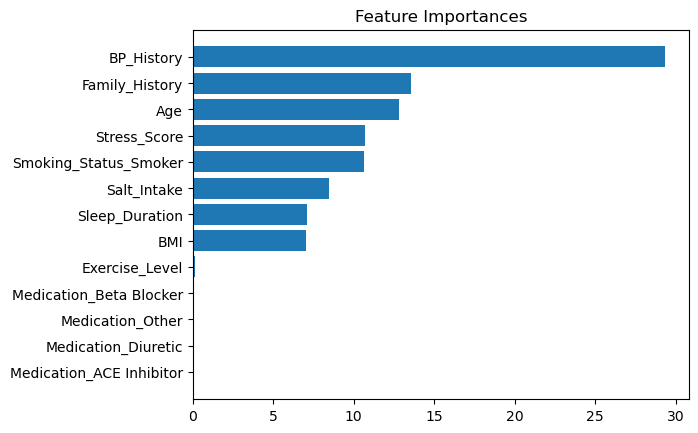

In [18]:
importances = models['CatBoost'].feature_importances_
feature_names = X.columns
sorted_idx = importances.argsort()
print ("Feature importances:\n", pd.Series(importances, index=feature_names).sort_values(ascending=False))

plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importances")


100%|===================| 1984/1985 [01:56<00:00]        

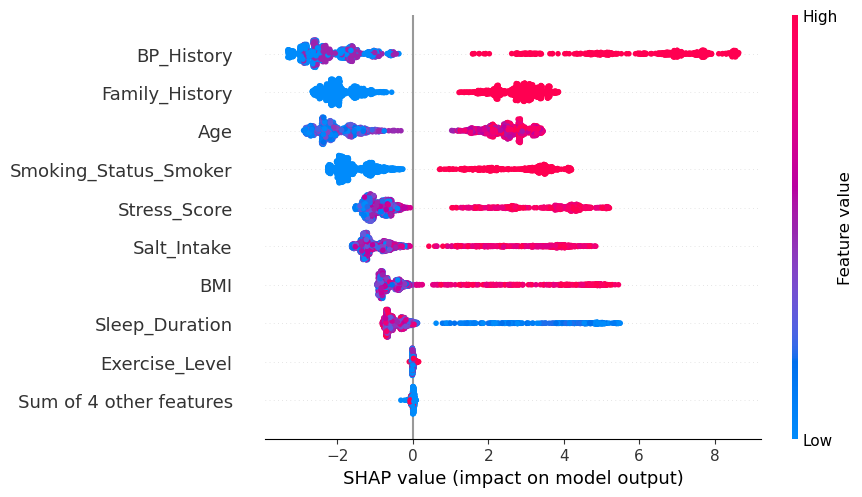

In [55]:

# Ensure all boolean columns are converted to int for SHAP compatibility
X_shap = X.copy()
for col in X_shap.select_dtypes(include='bool').columns:
	X_shap[col] = X_shap[col].astype(int)

import shap
explainer = shap.Explainer(models['CatBoost'], X_shap)
shap_values = explainer(X_shap)
shap.plots.beeswarm(shap_values)


In [56]:
# train_model.py
import joblib

joblib.dump(models['CatBoost'], "rf_hypertension_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")


['model_features.pkl']